In [1]:
import pandas as pd
import sys
import re
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import gif
import pylab

In [ ]:
os.listdir()

In [37]:
ace_data = pd.read_csv('data/ACE_MAGSWE_Data.txt', delimiter=' ')
ace_hour = pd.read_csv('data/full_mag_data.txt', delimiter=' ')
pos_hour = pd.read_csv('data/ace_hourly_data.txt', delimiter=' ')
pos_hour.head()

,year,day,hr,minute,sec,pos_gse_x,pos_gse_y,pos_gse_z,Unnamed: 8
0,2019,48,0,0,29.030,1406400.0,186100.0,-120890.0,NaN
1,2019,48,0,1,33.053,1406400.0,186100.0,-120890.0,NaN
2,2019,48,0,2,36.989,1406400.0,186110.0,-120890.0,NaN
3,2019,48,0,3,41.011,1406400.0,186110.0,-120890.0,NaN
4,2019,48,0,4,45.034,1406400.0,186110.0,-120900.0,NaN


In [ ]:
ace_data.head()

In [38]:
# Handy stuff
ace_data = ace_data[ace_data.bgsex != -9999.9]
ace_data = ace_data[ace_data.bgsey != -9999.9]
ace_data = ace_data[ace_data.bgsez != -9999.9]

ace_hour = ace_hour[ace_hour.b_gse_x != -9999.9]
ace_hour = ace_hour[ace_hour.b_gse_y != -9999.9]
ace_hour = ace_hour[ace_hour.b_gse_z != -9999.9]

pos_hour = pos_hour[pos_hour.pos_gse_x != -9999.9]
pos_hour = pos_hour[pos_hour.pos_gse_y != -9999.9]
pos_hour = pos_hour[pos_hour.pos_gse_z != -9999.9]

# Use this to cycle through the days required and make a gif
days_needed = ace_hour['day'].unique().tolist()
hours_needed = ace_hour['hr'].unique().tolist()

# axis limiters for main script
xmin = ace_hour.b_gse_x.min()
xmax = ace_hour.b_gse_x.max()
ymin = ace_hour.b_gse_y.min()
ymax = ace_hour.b_gse_y.max()

# pos limiters
pos_xmin = pos_hour.pos_gse_x.min()
pos_xmax = pos_hour.pos_gse_x.max()
pos_ymin = pos_hour.pos_gse_y.min()
pos_ymax = pos_hour.pos_gse_y.max()
pos_zmin = pos_hour.pos_gse_z.min()
pos_zmax = pos_hour.pos_gse_z.max()

In [33]:
ace_hour.b_gse_y.max()
ace_hour.groupby('b_gse_y').count().max(level=0)
df = ace_hour[ace_hour['day'].isin(days_needed)]
yes = df.groupby(df['b_gse_y'].apply(lambda x: round(x, 1))).count().max(level=0)
yes[yes['year']==193]

,year,day,hr,min,sec,b_gse_x,b_gse_y,b_gse_z,Unnamed: 8
b_gse_y,,,,,,,,,
-2.8,193,193,193,193,193,193,193,193,0


In [89]:
@gif.frame
def space_plot(day, df, pos_df):
    data = df[df.day == day]
    pos_data = pos_df[pos_df.day == day]
    hours_needed = data['hr'].unique().tolist()
    
    for hr in hours_needed:
        data = data[data.hr == hr]
        pos_data = pos_data[pos_data.hr == hr].head(1)
        
        x_border = [xmin, xmax]
        y_border = [ymin, ymax]
        
        pos_x_border = [pos_xmin, pos_xmax]
        pos_y_border = [pos_ymin, pos_ymax]

        x_data = data.b_gse_x.append(pd.Series(xmax))
        x_data = x_data.append(pd.Series(xmin))
        y_data = data.b_gse_y.append(pd.Series(ymax))
        y_data = y_data.append(pd.Series(ymin))
        
        grid_setting = 20
        
        fig, axs = plt.subplots(ncols=2, sharey=False, sharex=False, figsize=(14, 8))
        fig.subplots_adjust(hspace=0.5, left=0.07, right=0.93)
        fig.patch.set_facecolor('white')
        fig.patch.set_alpha(1)
        ax = axs[0]
        hb = ax.hexbin(x_data, y_data, cmap='inferno', 
                       gridsize=(grid_setting,grid_setting), vmin=0, vmax=5)
        # vmin=0, vmax=15 - for controlling the colour limits
        ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
        ax.set_title("Regular Hexagon binning")
        ax.set_xlabel('Magentic Field (nT) across X position')
        ax.set_ylabel('Magentic Field (nT) across Y position')
        cb = fig.colorbar(hb, ax=ax)
        cb.set_label('Counts')

        ax = axs[1]
        print(dir(ax))
        #ax.add_subplot(111, projection='3d')
        #hb = ax.add_subplot(111, projection='3d')
        # This makes the 3d scatter plot, man
        ax.set(xlim=(pos_xmin, pos_xmax), ylim=(pos_ymin, pos_ymax))
        x = pos_data['pos_gse_x']
        y = pos_data['pos_gse_y']
        z = pos_data['pos_gse_z']
        ax.plot(x, y, 'ro')
        
        #hexbin(x_data, y_data, bins='log', cmap='inferno', 
         #              gridsize=(grid_setting,grid_setting))

        #ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
        #ax.set_title("With a log color scale")
        #ax.set_xlabel('GSE Position X')
        #ax.set_ylabel('GSE Position Y')
        #ax.set_zlabel('GSE Position z')
        #cb.set_label('log10(N)')

        
        
        
        fig.suptitle("""Magnetic Field Experiment - Day: {0}, Hour: {1}""".format(day, hr), 
                     size = 16)

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_add_text', '_adjustable', '_agg_filter', '_alpha', '_anchor', '_animated', '_aspect', '_autoscaleXon', '_autoscaleYon', '_autotitlepos', '_axes', '_axes_class', '_axes_locator', '_axisbelow', '_clipon', '_clippath', '_contains', '_convert_dx', '_current_image', '_default_contains', '_facecolor', '_frameon', '_gci', '_gen_axes_patch', '_gen_axes_spines', '_get_axis_list', '_get_axis_map', '_get_clipping_extent_bbox', '_get_lines', '_get_patches_for_fill', '_get_view', '_gid', '_gridOn', '_in_layout', '_init_axis', '_label', '_layoutbox', '_left_title', '_make_twin_axes', '_mouseover', '_mouseover_set', '_navigate',

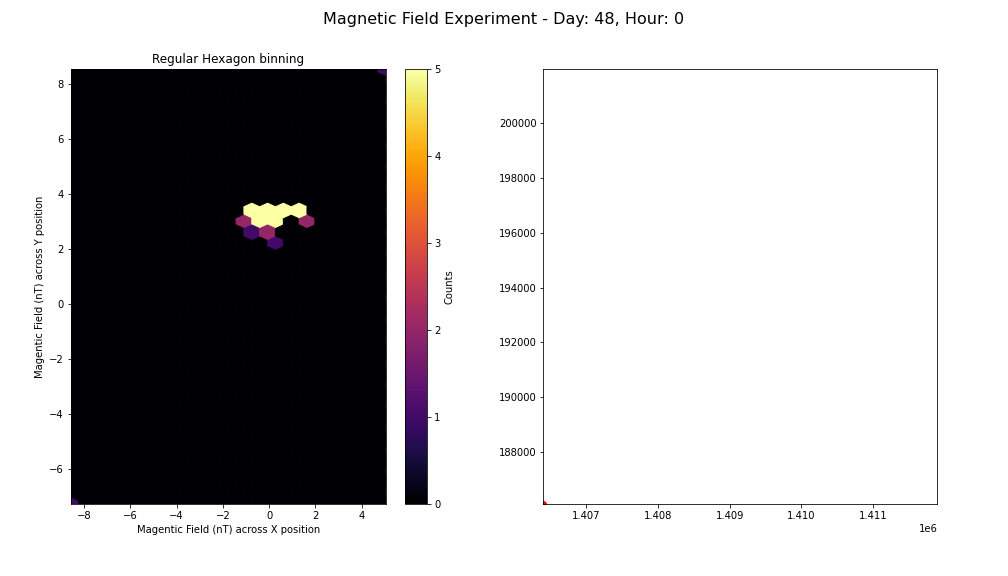

In [90]:
day=days_needed[0]
hr=hours_needed[0]
data = ace_hour[(ace_hour.hr==hr) & (ace_hour.day==day)]
pos_yes = pos_hour[(pos_hour.hr==hr) & (pos_hour.day==day)].head(1)
pos_yes
#data.groupby(data['b_gse_x'].apply(lambda x: round(x, 1))).count().max(level=0)
space_plot(day=day, df=data, pos_df=pos_yes)

In [86]:
frames = []
for day in days_needed:
    for hr in hours_needed:
        data = ace_hour[(ace_hour.hr==hr) & (ace_hour.day==day)]
        frame = space_plot(day=day, df=data, pos_df=pos_hour)
        frames.append(frame)

gif.save(frames, 'magnetic_field_over_time.gif', duration=100)

In [ ]:
xmin = ace_data.bgsex.min()
xmax = ace_data.bgsex.max()
ymin = ace_data.bgsey.min()
ymax = ace_data.bgsey.max()

fig, axs = plt.subplots(ncols=2, sharey=True, figsize=(14, 8))
fig.subplots_adjust(hspace=0.5, left=0.07, right=0.93)
ax = axs[0]
hb = ax.hexbin(ace_data.bgsex, ace_data.bgsey, gridsize=50, cmap='inferno',  
               vmin=0, vmax=200)
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
ax.set_title("Hexagon binning")
ax.set_xlabel('Magentic Field across X position')
ax.set_ylabel('Magentic Field across y position')
cb = fig.colorbar(hb, ax=ax)
cb.set_label('counts')

ax = axs[1]
hb = ax.hexbin(ace_data.bgsex, ace_data.bgsey, gridsize=50, bins='log', cmap='inferno')

ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
ax.set_title("With a log color scale")
ax.set_xlabel('Magentic Field across X position')
ax.set_ylabel('Magentic Field across y position')
cb = fig.colorbar(hb, ax=ax)
cb.set_label('log10(N)')

fig.suptitle('Magnetic Field Experiment - ACE Solar Probe\nMagnetic Field Generation across X, Y Position of Spacecraft', 
             size = 16)

plt.show()

In [ ]:
@gif.frame
def plot(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    plt.figure(figsize=(5, 3), dpi=100)
    plt.plot(x, y, color='red')

frames = []
for i in range(100):
    frame = plot(i)
    frames.append(frame)

gif.save(frames, "examples/wave.gif", duration=20)

,year,day,hr,minute,sec,pos_gse_x,pos_gse_y,pos_gse_z,Unnamed: 8
0,2019,48,0,0,29.030,1406400.0,186100.0,-120890.0,NaN
1,2019,48,0,1,33.053,1406400.0,186100.0,-120890.0,NaN
2,2019,48,0,2,36.989,1406400.0,186110.0,-120890.0,NaN
3,2019,48,0,3,41.011,1406400.0,186110.0,-120890.0,NaN
4,2019,48,0,4,45.034,1406400.0,186110.0,-120900.0,NaN


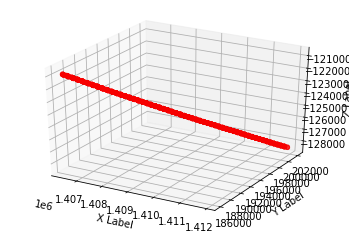

In [36]:
# This makes the 3d scatter plot, man
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = pos_hour['pos_gse_x']
y = pos_hour['pos_gse_y']
z = pos_hour['pos_gse_z']

ax.scatter(x, y, z, c='r', marker='o', alpha=0.1)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
pos_hour.head()
#plt.show()

In [ ]:
plt.scatter(x,y, s=1, alpha=0.4, linewidths=3, c=z, cmap=plt.cm.coolwarm)
plt.show()

In [ ]:
# Make a histogram of each hour for day 48, across pos_gse_x
# first, filter out the minute to 0, and then filter that to day 48
ace_single_hour = ace_hour[(ace_hour.minute==0) & (ace_single_hour.day==48)]
ace_single_hour.head()

In [ ]:
_ = plt.hist(ace_single_hour['pos_gse_x'], bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")

plt.show()

In [ ]:
fig = plt.figure(figsize=(6,5))
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
ax = fig.add_axes([left, bottom, width, height]) 

start, stop, n_values = -8, 8, 800

x_vals = np.linspace(start, stop, n_values)
y_vals = np.linspace(start, stop, n_values)
X, Y = np.meshgrid(x_vals, y_vals)


Z = np.sqrt(X**2 + Y**2)

In [ ]:
np.reshape(ace_single_hour['pos_gse_x'], newshape=9)

cp = plt.contourf(X, Y, Z)
plt.colorbar(cp)

ax.set_title('Contour Plot')
ax.set_xlabel('x (cm)')
ax.set_ylabel('y (cm)')
plt.show()

In [4]:
os.dir()

AttributeError: module 'os' has no attribute 'dir'